<a href="https://colab.research.google.com/github/darguellesUOC/VD_PEC2/blob/main/ParallelCoordinatesPlot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
from sklearn.preprocessing import MinMaxScaler

# Electricity generation in the European Union from 2020 to 2023, by fuel(in terawatt-hours)
# Enlace: https://www-statista-com.eu1.proxy.openathens.net/statistics/800217/eu-power-production-by-fuel/

import pandas as pd

# Cargamos el archivo csv con los datos
file_path = '/content/energy_sources_2023_v2.txt'
df = pd.read_csv(file_path)

# Comprobamos los datos
print(df.head())

   Year  Nuclear    Wind     Gas    Coal   Hydro   Solar  Bioenergy  \
0  2020   683.51  397.78  559.70  352.41  347.16  144.81     162.59   
1  2021   731.71  386.84  547.01  419.19  348.33  163.13     171.53   
2  2022   609.26  419.95  534.72  448.77  276.24  210.74     165.03   
3  2023   618.58  470.22  448.50  335.97  315.99  247.69     152.33   

   Other fossil  Other renewables  
0         97.66              7.23  
1        100.20              7.03  
2        105.38              6.93  
3         98.40              6.74  


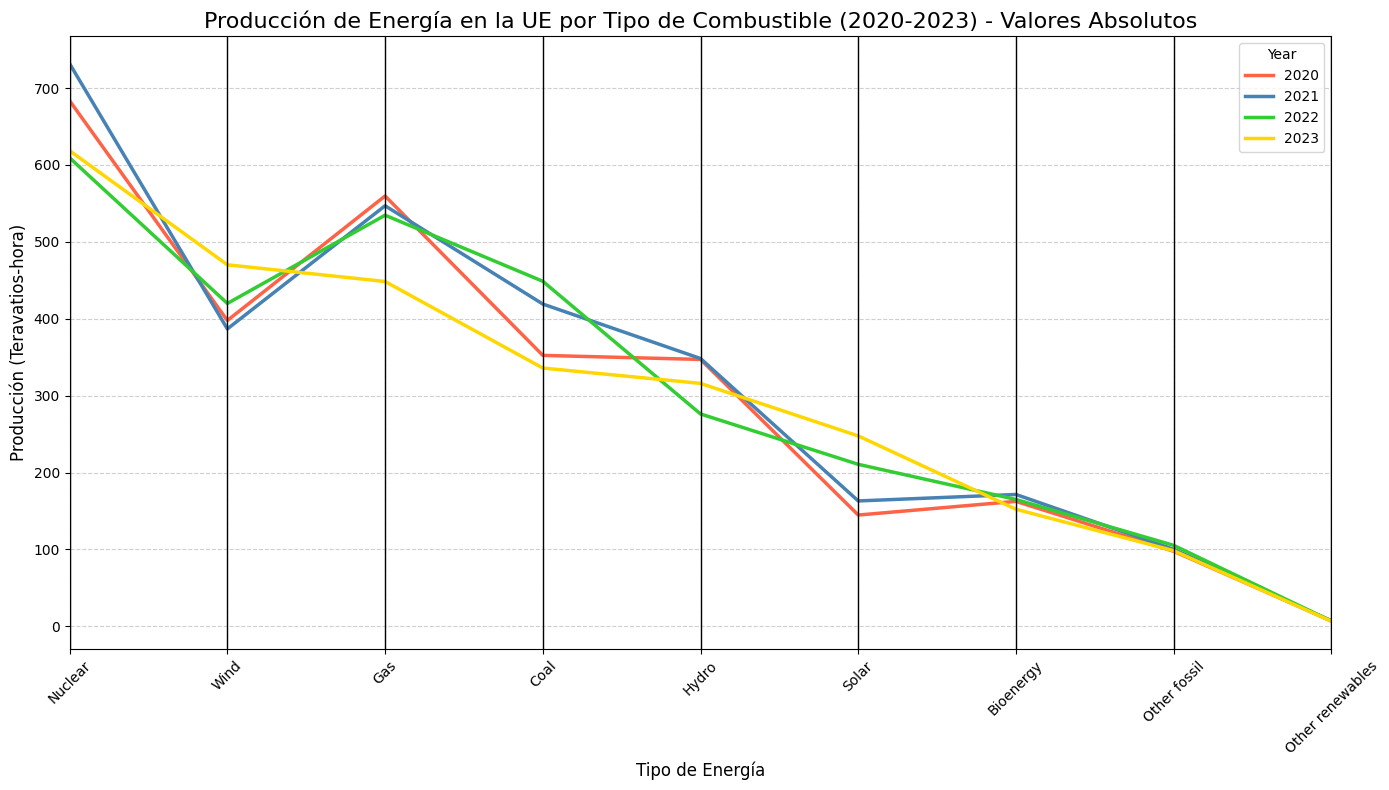

In [13]:
# ----- Primer Gráfico: Sin Normalizar -----
plt.figure(figsize=(14, 8))
parallel_coordinates(df, 'Year', color=('#FF6347', '#4682B4', '#32CD32', '#FFD700'), linewidth=2.5)

# Configuramos el grafico
plt.title("Producción de Energía en la UE por Tipo de Combustible (2020-2023) - Valores Absolutos", fontsize=16)
plt.ylabel("Producción (Teravatios-hora)", fontsize=12)
plt.xlabel("Tipo de Energía", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)

# Leyenda y ajuste del layout
plt.legend(title="Year", loc="upper right", fontsize=10)
plt.tight_layout()

plt.show()

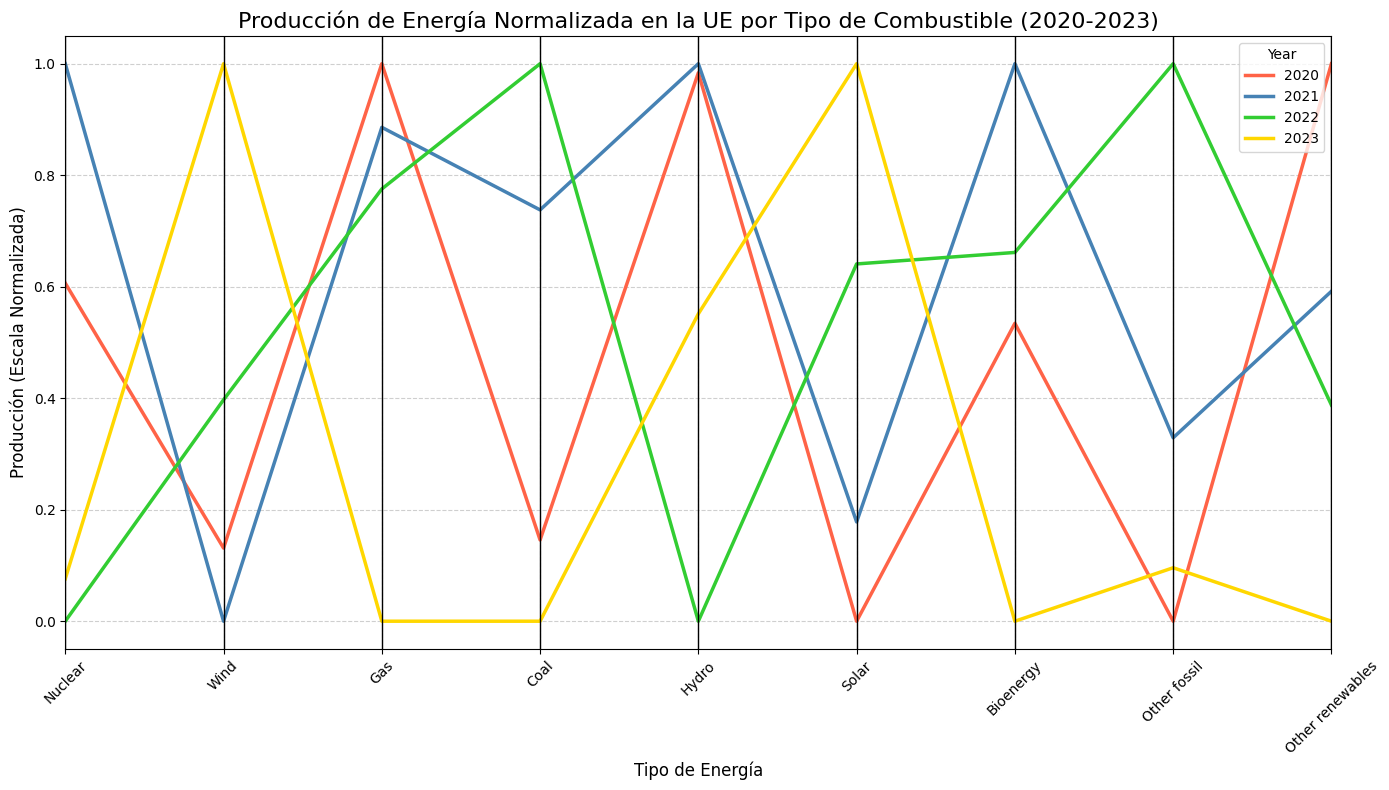

In [14]:

# ----- Segundo Gráfico: Normalizado -----

# Normalizamos los datos (excluyendo la columna Year)
scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized.iloc[:, 1:] = scaler.fit_transform(df.iloc[:, 1:])

# Creamos el gráfico normalizado
plt.figure(figsize=(14, 8))
parallel_coordinates(df_normalized, 'Year', color=('#FF6347', '#4682B4', '#32CD32', '#FFD700'), linewidth=2.5)

# Configuramos el grafico
plt.title("Producción de Energía Normalizada en la UE por Tipo de Combustible (2020-2023)", fontsize=16)
plt.ylabel("Producción (Escala Normalizada)", fontsize=12)
plt.xlabel("Tipo de Energía", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)

# Leyenda y ajuste
plt.legend(title="Year", loc="upper right", fontsize=10)
plt.tight_layout()

plt.show()